# Exercise 5 : Classification Tree
### Problems
#### Problem 1 : Predicting CentralAir using SalePrice
#### In this problem, you will build a Classification Tree model to predict CentralAir using SalePrice and judge its accuracy.
#### a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit two Classification Tree models (of max depth 2 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.
#### b) Print the confusion matrix on Train set and Test set for both the aforesaid models. Compute and print for both the trees the Classification Accuracy, True Positive Rate, False Positive Rate. Which of the two models is better?


In [103]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [104]:
housedata = pd.read_csv('train.csv')
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Simple Tree

Response: CentralAir

Predictor: SalePrice

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9434931506849316
False Positive Rate 		: 0.7837837837837838
False Negative Rate 		: 0.007312614259597806

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.934931506849315
False Positive Rate 		: 0.7619047619047619
False Negative Rate 		: 0.01107011070110701



<AxesSubplot:>

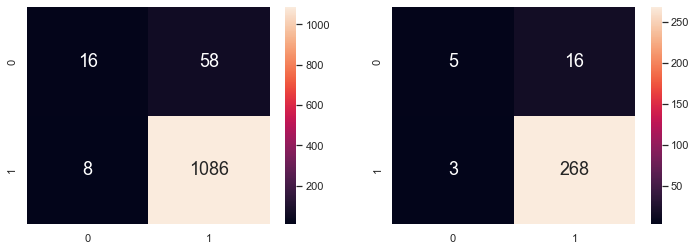

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# get the dataset Central Air and SalePrice

CentralAir = pd.DataFrame(housedata['CentralAir'])
SalePrice = pd.DataFrame(housedata['SalePrice'])

# split into train & test
X_train1, X_test1, y_train1, y_test1 = train_test_split(SalePrice, CentralAir, test_size = 0.20)

# Create DecisionTree using Train data
dectree1 = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree1.fit(X_train1, y_train1)                  # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred1 = dectree.predict(X_train1)
y_test_pred1 = dectree.predict(X_test1)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train1, y_train1))
TN_train1 = confusion_matrix(y_train1, y_train_pred1)[0][0]
FP_train1 = confusion_matrix(y_train1, y_train_pred1)[0][1]
FN_train1 = confusion_matrix(y_train1, y_train_pred1)[1][0]
TP_train1 = confusion_matrix(y_train1, y_train_pred1)[1][1]

FPRate_train1 = FP_train1 / (TN_train1 + FP_train1)
FNRate_train1 = FN_train1 / (TP_train1 + FN_train1)
print("False Positive Rate \t\t:", FPRate_train1)
print("False Negative Rate \t\t:", FNRate_train1)

print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test1, y_test1))
TN_test1 = confusion_matrix(y_test1, y_test_pred1)[0][0]
FP_test1 = confusion_matrix(y_test1, y_test_pred1)[0][1]
FN_test1 = confusion_matrix(y_test1, y_test_pred1)[1][0]
TP_test1 = confusion_matrix(y_test1, y_test_pred1)[1][1]

FPRate_test1 = FP_test1 / (TN_test1 + FP_test1)
FNRate_test1 = FN_test1 / (TP_test1 + FN_test1)
print("False Positive Rate \t\t:", FPRate_test1)
print("False Negative Rate \t\t:", FNRate_test1)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train1, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test1, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])




In [119]:
CentralAir.head()

,CentralAir
0,Y
1,Y
2,Y
3,Y
4,Y


[Text(334.8, 543.6, 'SalePrice <= 98300.0\ngini = 0.119\nsamples = 1168\nvalue = [74, 1094]\nclass = Yes'),
 Text(167.4, 326.16, 'SalePrice <= 59250.0\ngini = 0.492\nsamples = 87\nvalue = [38, 49]\nclass = Yes'),
 Text(83.7, 108.72000000000003, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = No'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.473\nsamples = 78\nvalue = [30, 48]\nclass = Yes'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 137950.0\ngini = 0.064\nsamples = 1081\nvalue = [36, 1045]\nclass = Yes'),
 Text(418.5, 108.72000000000003, 'gini = 0.179\nsamples = 281\nvalue = [28, 253]\nclass = Yes'),
 Text(585.9, 108.72000000000003, 'gini = 0.02\nsamples = 800\nvalue = [8, 792]\nclass = Yes')]

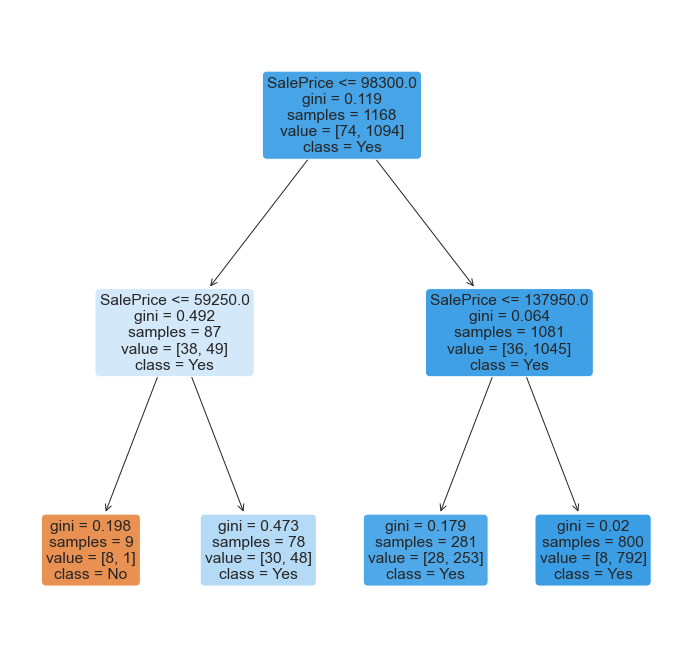

In [127]:
# Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No","Yes"])

In [143]:
SalePrice = SalePrice.drop(SalePrice[(SalePrice.value <= 98300)].index, inplace = True)

AttributeError: 'DataFrame' object has no attribute 'value'

In [109]:
dectree2 = DecisionTreeClassifier(max_depth = 4)
dectree2.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=4)

[Text(881.8392857142857, 1467.72, 'SalePrice <= 107700.0\ngini = 0.122\nsamples = 1168\nvalue = [76, 1092]\nclass = Yes'),
 Text(478.2857142857143, 1141.56, 'SalePrice <= 79250.0\ngini = 0.459\nsamples = 129\nvalue = [46, 83]\nclass = Yes'),
 Text(239.14285714285714, 815.4000000000001, 'SalePrice <= 62750.0\ngini = 0.435\nsamples = 25\nvalue = [17, 8]\nclass = No'),
 Text(119.57142857142857, 489.24, 'SalePrice <= 46000.0\ngini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = No'),
 Text(59.785714285714285, 163.08000000000015, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(179.35714285714286, 163.08000000000015, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]\nclass = No'),
 Text(358.7142857142857, 489.24, 'SalePrice <= 68450.0\ngini = 0.497\nsamples = 13\nvalue = [7, 6]\nclass = No'),
 Text(298.92857142857144, 163.08000000000015, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = Yes'),
 Text(418.5, 163.08000000000015, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]\nclass = No'),


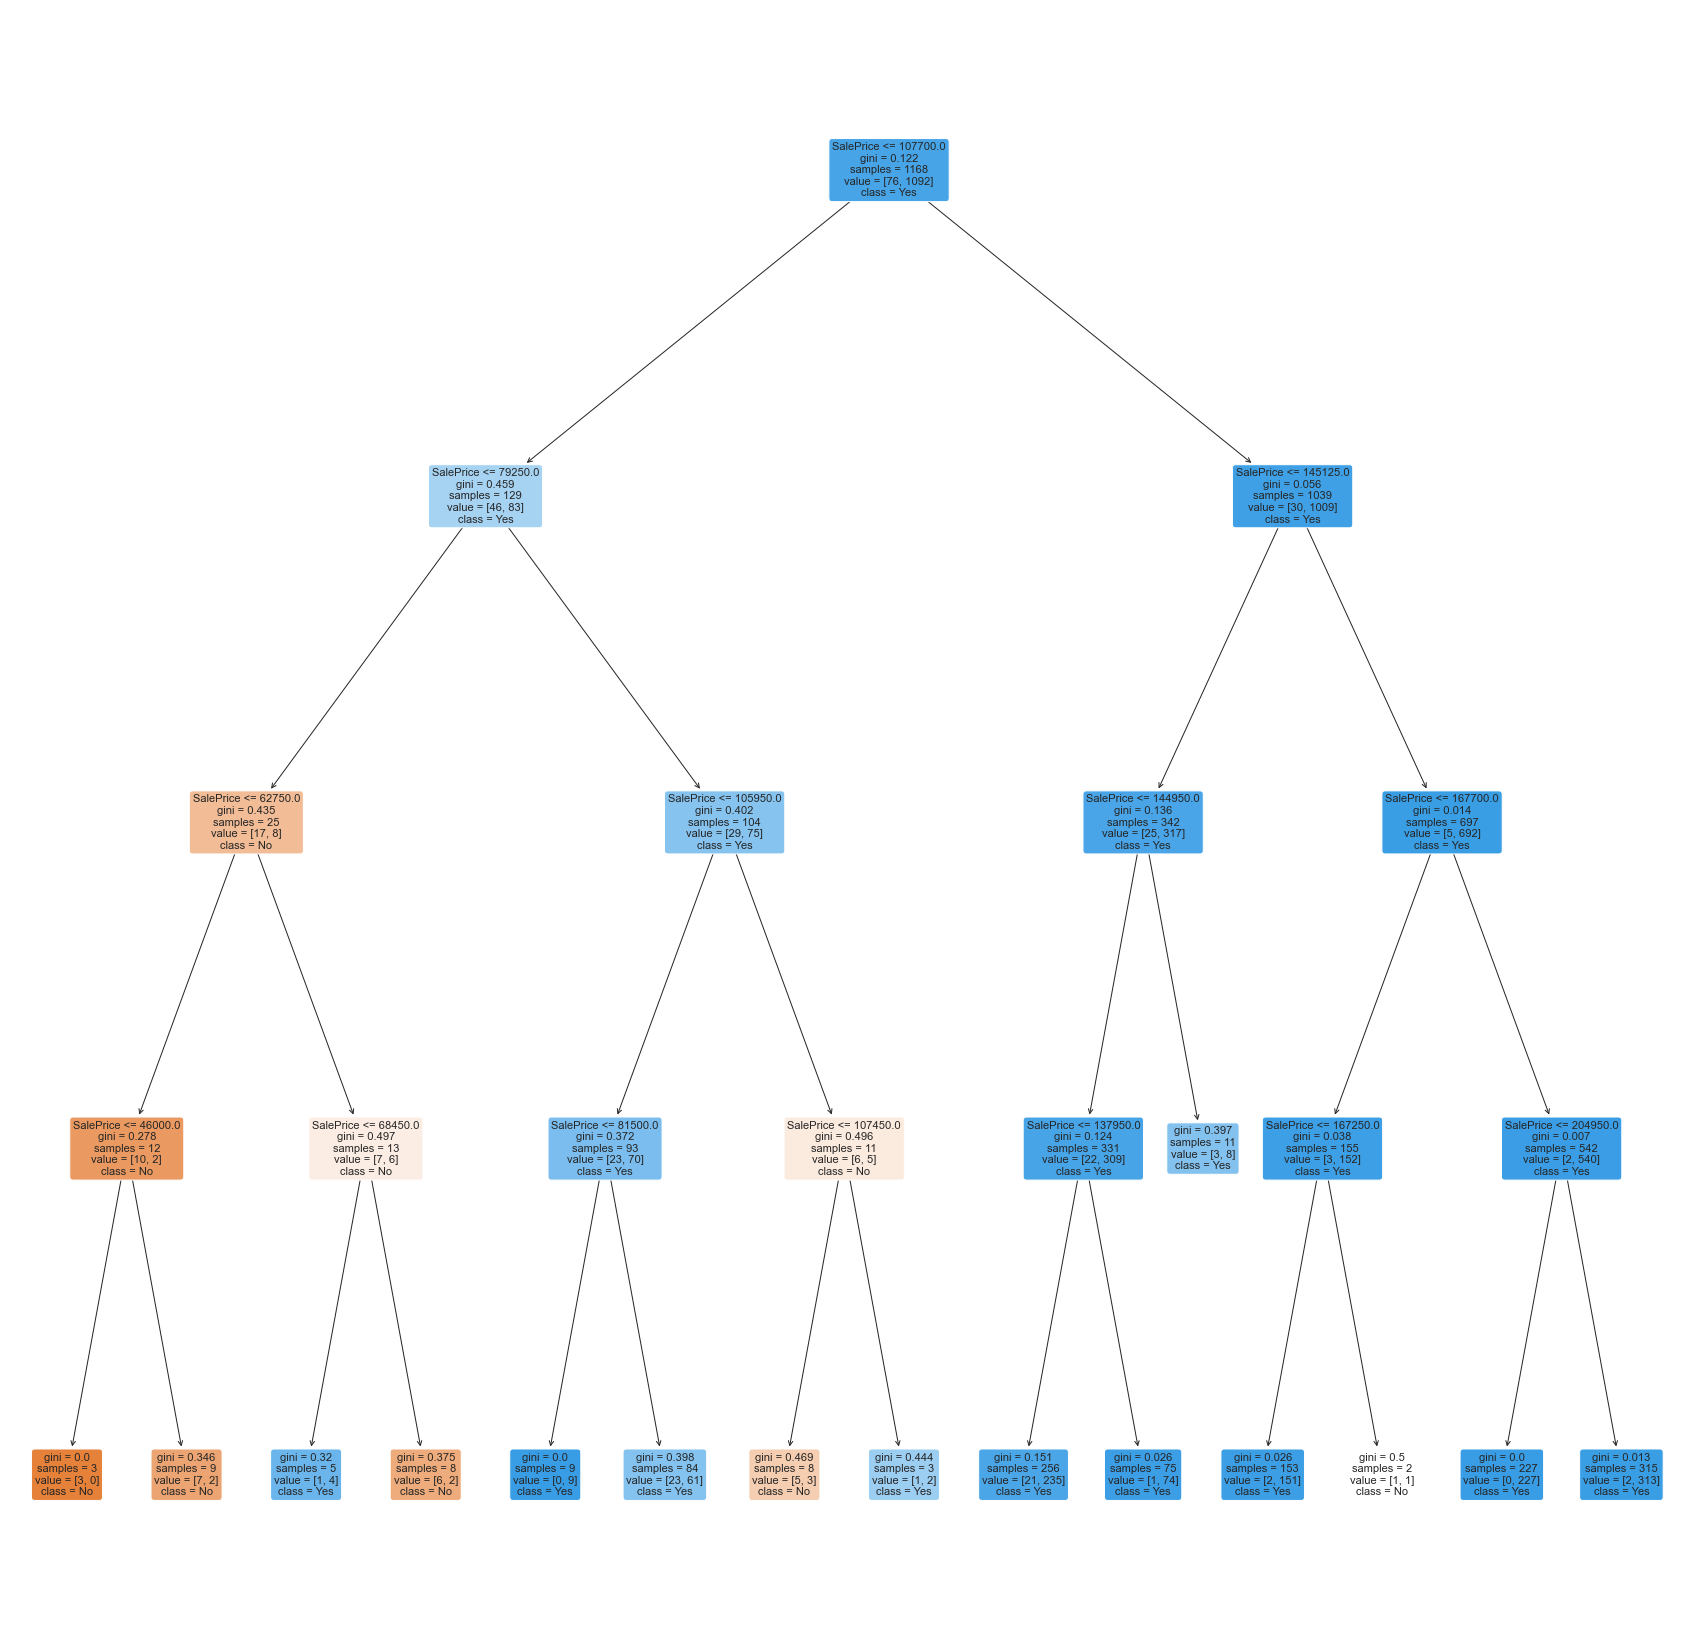

In [128]:
# Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(30,30))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No","Yes"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.06592465753424658
False Positive Rate 		: 0.8354430379746836
False Negative Rate 		: 0.006427915518824609

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.0547945205479452
False Positive Rate 		: 0.8125
False Negative Rate 		: 0.007246376811594203



<AxesSubplot:>

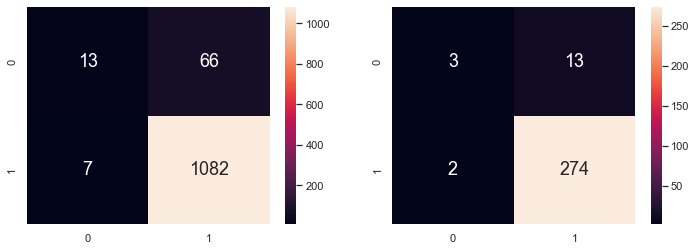

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# get the dataset Central Air and SalePrice

CentralAir = pd.DataFrame(housedata['CentralAir'])
OverallQual = pd.DataFrame(housedata['OverallQual'])

# split into train & test
X_train3, X_test3, y_train3, y_test3 = train_test_split(OverallQual, CentralAir, test_size = 0.20)

# Create DecisionTree using Train data
dectree3 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree3.fit(X_train3, y_train3)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred3 = dectree3.predict(X_train3)
y_test_pred3 = dectree3.predict(X_test3)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
TN_train3 = confusion_matrix(y_train3, y_train_pred3)[0][0]
FP_train3 = confusion_matrix(y_train3, y_train_pred3)[0][1]
FN_train3 = confusion_matrix(y_train3, y_train_pred3)[1][0]
TP_train3 = confusion_matrix(y_train3, y_train_pred3)[1][1]

FPRate_train3 = FP_train3 / (TN_train3 + FP_train3)
FNRate_train3 = FN_train3 / (TP_train3 + FN_train3)
print("False Positive Rate \t\t:", FPRate_train3)
print("False Negative Rate \t\t:", FNRate_train3)

print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test3, y_test3))
TN_test3 = confusion_matrix(y_test3, y_test_pred3)[0][0]
FP_test3 = confusion_matrix(y_test3, y_test_pred3)[0][1]
FN_test3 = confusion_matrix(y_test3, y_test_pred3)[1][0]
TP_test3 = confusion_matrix(y_test3, y_test_pred3)[1][1]

FPRate_test3 = FP_test3 / (TN_test3 + FP_test3)
FNRate_test3 = FN_test3 / (TP_test3 + FN_test3)
print("False Positive Rate \t\t:", FPRate_test3)
print("False Negative Rate \t\t:", FNRate_test3)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train3, y_train_pred3),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test3, y_test_pred3), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(243.4909090909091, 587.0880000000001, 'OverallQual <= 3.5\ngini = 0.126\nsamples = 1168\nvalue = [79, 1089]\nclass = Yes'),
 Text(121.74545454545455, 456.624, 'OverallQual <= 2.5\ngini = 0.455\nsamples = 20\nvalue = [13, 7]\nclass = No'),
 Text(60.872727272727275, 326.1600000000001, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = No'),
 Text(182.61818181818182, 326.1600000000001, 'gini = 0.498\nsamples = 15\nvalue = [8, 7]\nclass = No'),
 Text(365.23636363636365, 456.624, 'OverallQual <= 4.5\ngini = 0.108\nsamples = 1148\nvalue = [66, 1082]\nclass = Yes'),
 Text(304.3636363636364, 326.1600000000001, 'gini = 0.325\nsamples = 98\nvalue = [20, 78]\nclass = Yes'),
 Text(426.1090909090909, 326.1600000000001, 'OverallQual <= 6.5\ngini = 0.084\nsamples = 1050\nvalue = [46, 1004]\nclass = Yes'),
 Text(304.3636363636364, 195.69600000000003, 'OverallQual <= 5.5\ngini = 0.126\nsamples = 621\nvalue = [42, 579]\nclass = Yes'),
 Text(243.4909090909091, 65.23200000000008, 'gini = 0.144\nsampl

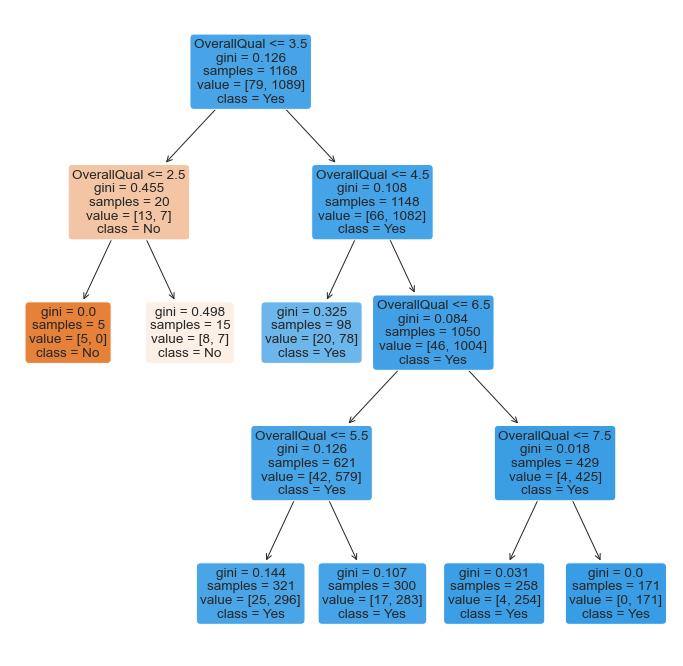

In [129]:
# Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree3, filled=True, rounded=True, 
          feature_names=["OverallQual"], 
          class_names=["No","Yes"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.06592465753424658
False Positive Rate 		: 0.8974358974358975
False Negative Rate 		: 0.003669724770642202

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.05821917808219178
False Positive Rate 		: 1.0
False Negative Rate 		: 0.007272727272727273



<AxesSubplot:>

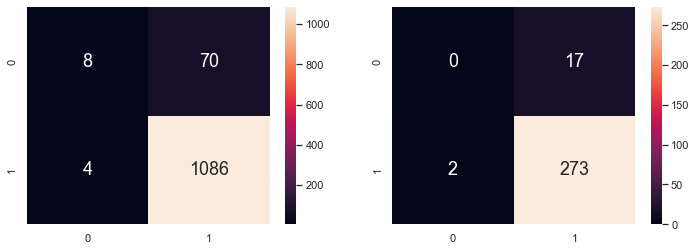

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# get the dataset Central Air and SalePrice

CentralAir = pd.DataFrame(housedata['CentralAir'])
YearBuilt = pd.DataFrame(housedata['YearBuilt'])

# split into train & test
X_train4, X_test4, y_train4, y_test4 = train_test_split(YearBuilt, CentralAir, test_size = 0.20)

# Create DecisionTree using Train data
dectree4 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree4.fit(X_train4, y_train4)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred4 = dectree4.predict(X_train4)
y_test_pred4 = dectree4.predict(X_test4)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
TN_train4 = confusion_matrix(y_train4, y_train_pred4)[0][0]
FP_train4 = confusion_matrix(y_train4, y_train_pred4)[0][1]
FN_train4 = confusion_matrix(y_train4, y_train_pred4)[1][0]
TP_train4 = confusion_matrix(y_train4, y_train_pred4)[1][1]

FPRate_train4 = FP_train4 / (TN_train4 + FP_train4)
FNRate_train4 = FN_train4 / (TP_train4 + FN_train4)
print("False Positive Rate \t\t:", FPRate_train4)
print("False Negative Rate \t\t:", FNRate_train4)

print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test4, y_test4))
TN_test4 = confusion_matrix(y_test4, y_test_pred4)[0][0]
FP_test4 = confusion_matrix(y_test4, y_test_pred4)[0][1]
FN_test4 = confusion_matrix(y_test4, y_test_pred4)[1][0]
TP_test4 = confusion_matrix(y_test4, y_test_pred4)[1][1]

FPRate_test4 = FP_test4 / (TN_test4 + FP_test4)
FNRate_test4 = FN_test4 / (TP_test4 + FN_test4)
print("False Positive Rate \t\t:", FPRate_test4)
print("False Negative Rate \t\t:", FNRate_test4)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train4, y_train_pred4),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test4, y_test_pred4), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(883.5, 1467.72, 'YearBuilt <= 1949.5\ngini = 0.125\nsamples = 1168\nvalue = [78, 1090]\nclass = Yes'),
 Text(465.0, 1141.56, 'YearBuilt <= 1917.5\ngini = 0.384\nsamples = 259\nvalue = [67, 192]\nclass = Yes'),
 Text(186.0, 815.4000000000001, 'YearBuilt <= 1877.5\ngini = 0.496\nsamples = 66\nvalue = [30, 36]\nclass = Yes'),
 Text(93.0, 489.24, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No'),
 Text(279.0, 489.24, 'YearBuilt <= 1891.0\ngini = 0.492\nsamples = 64\nvalue = [28, 36]\nclass = Yes'),
 Text(186.0, 163.08000000000015, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]\nclass = Yes'),
 Text(372.0, 163.08000000000015, 'gini = 0.499\nsamples = 56\nvalue = [27, 29]\nclass = Yes'),
 Text(744.0, 815.4000000000001, 'YearBuilt <= 1948.5\ngini = 0.31\nsamples = 193\nvalue = [37, 156]\nclass = Yes'),
 Text(651.0, 489.24, 'YearBuilt <= 1928.5\ngini = 0.281\nsamples = 183\nvalue = [31, 152]\nclass = Yes'),
 Text(558.0, 163.08000000000015, 'gini = 0.341\nsamples = 87\nvalue = [19, 68]\n

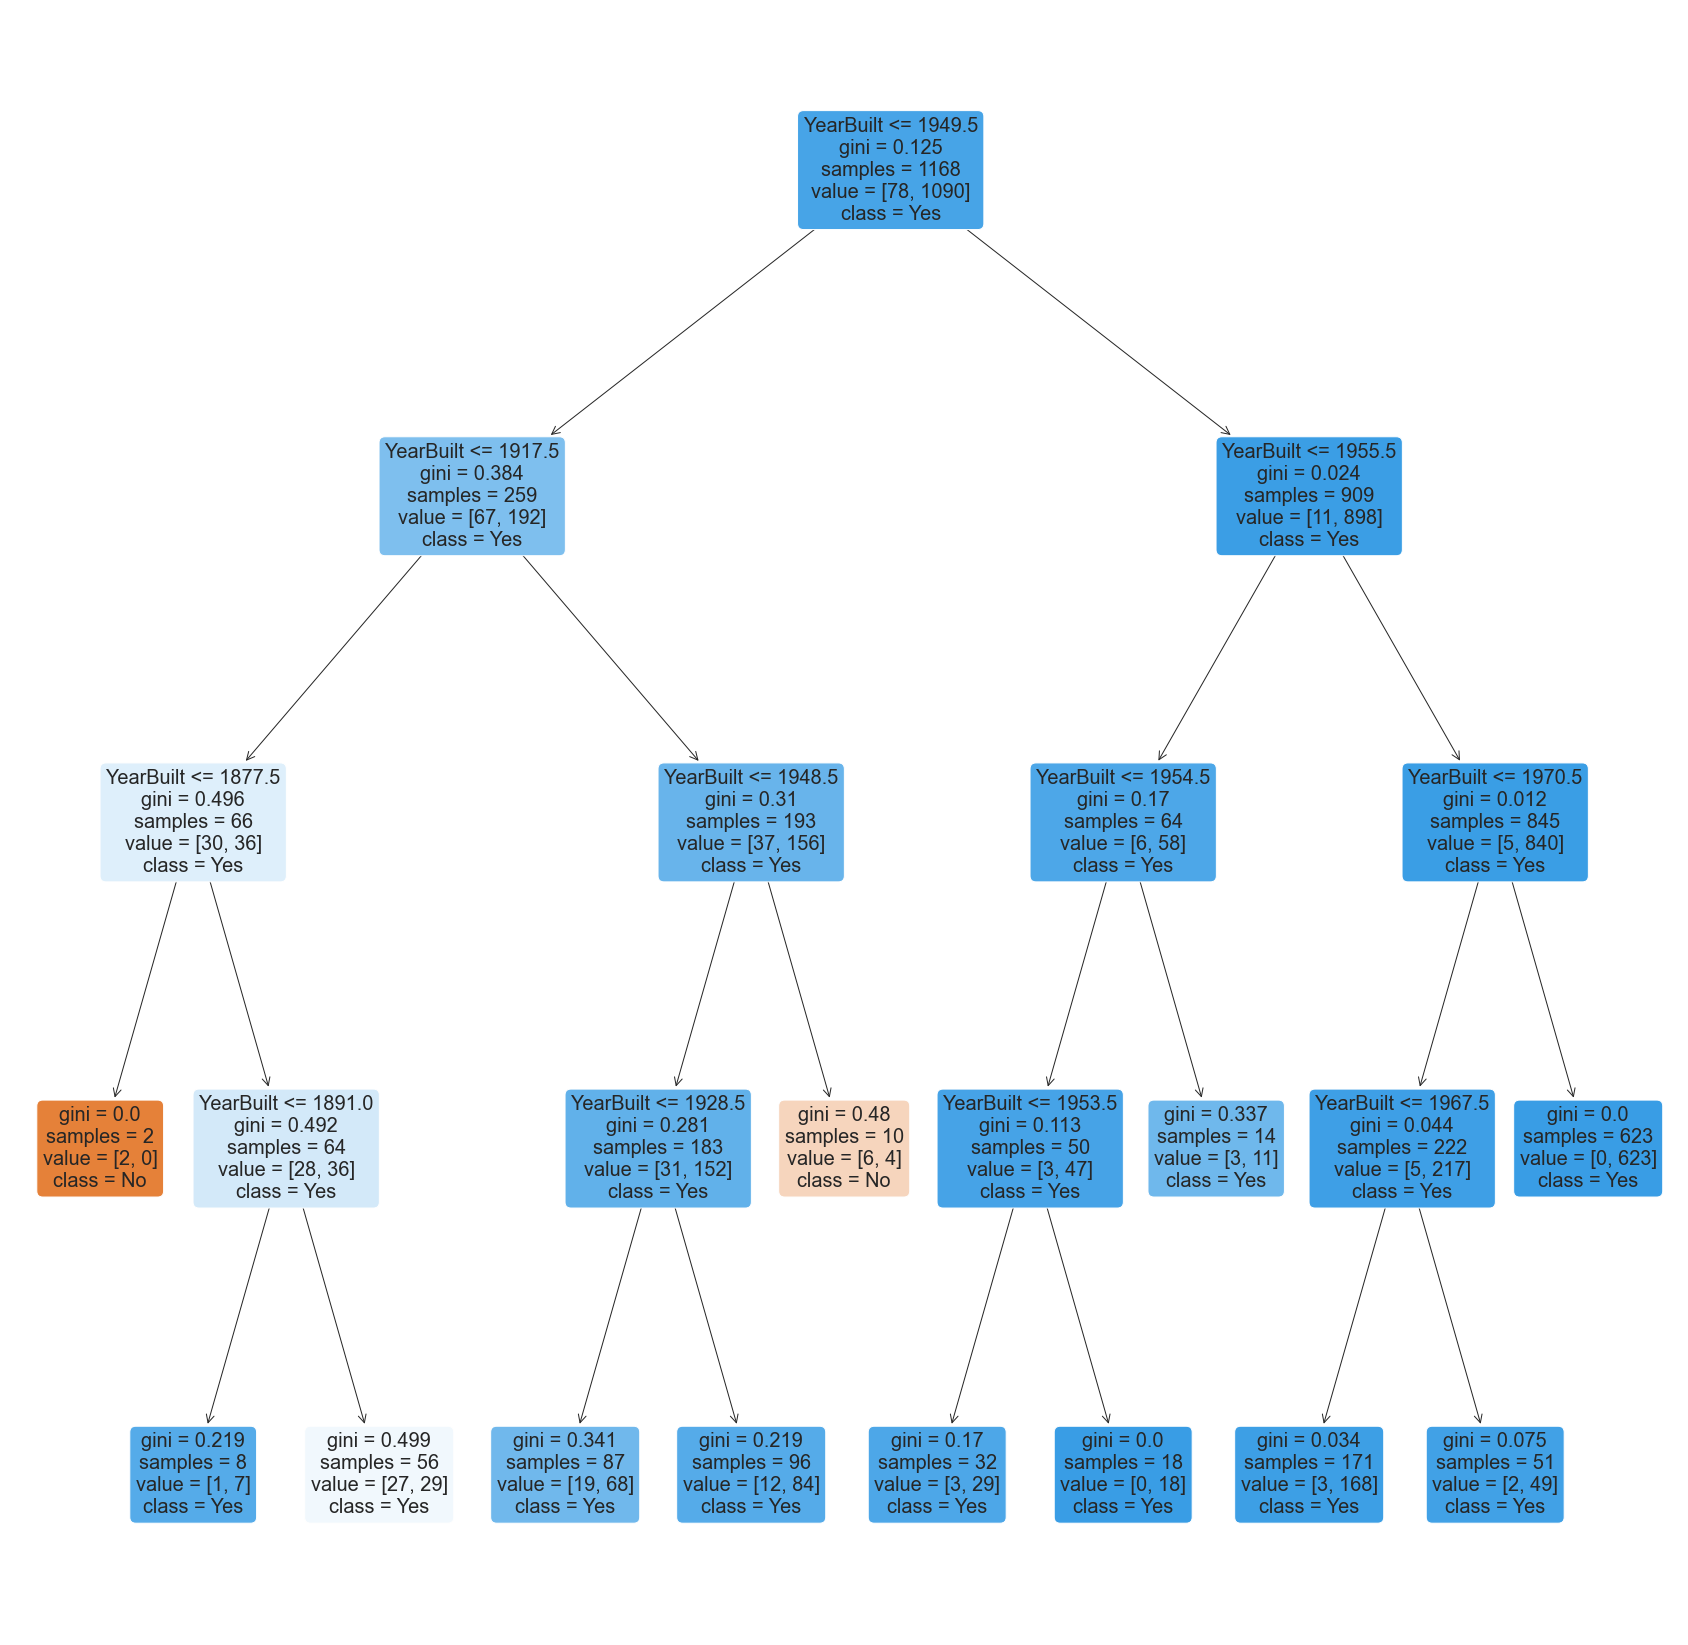

In [130]:
# Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(30,30))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=["YearBuilt"], 
          class_names=["No","Yes"])